## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

# A.J. Lozano

## 2/6/2019

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [3]:
df = pd.read_csv('ab_data.csv')

df.head(5)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


c. The number of unique users in the dataset.

In [5]:
df.nunique()

user_id         290584
timestamp       294478
group                2
landing_page         2
converted            2
dtype: int64

d. The proportion of users converted.

In [6]:
unique_users = df['user_id'].nunique()

converted_users = df.query("converted == 1").user_id.nunique()

converted_proportion = (converted_users / unique_users) *100

print('The percentage of converted users is:', converted_proportion,'%')
print('Just over', int(converted_proportion),'%')

The percentage of converted users is: 12.104245244060237 %
Just over 12 %


e. The number of times the `new_page` and `treatment` don't line up.

In [7]:
print(converted_users)

35173


f. Do any of the rows have missing values?

In [8]:
print(df.isnull().sum())

print('\n IT DOES NOT APPEAR THAT THERE ARE MISSING VALUES')

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

 IT DOES NOT APPEAR THAT THERE ARE MISSING VALUES


In [9]:
df.groupby(['group', 'landing_page']).count()

user_id  timestamp  converted
group     landing_page                               
control   new_page         1928       1928       1928
          old_page       145274     145274     145274
treatment new_page       145311     145311     145311
          old_page         1965       1965       1965

In [10]:
treat_old = (df[(df.group == 'treatment') & (df.landing_page == 'old_page')].shape[0])

# Alternative use query for same answer 
###df.query("group == 'treatment' & landing_page == 'old_page'").shape[0]

###df.query("group == 'control' & landing_page == 'new_page'").shape[0]

contr_new = (df[(df.group == 'control') & (df.landing_page == 'new_page')].shape[0]) 

In [11]:
not_aligned = treat_old + contr_new

print('The number of times treatment and control do not align is:', not_aligned)

The number of times treatment and control do not align is: 3893


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [12]:
df2 = df.drop(df.query('(group == "treatment" and landing_page != "new_page") or (group != "treatment" and landing_page == "new_page") or (group == "control" and landing_page != "old_page") or (group != "control" and landing_page == "old_page")').index)

In [13]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

In [14]:
df2.head(2)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0


`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [15]:
print('There are', df2['user_id'].nunique(), 'unique user id\'s in data frame two.')

There are 290584 unique user id's in data frame two.


b. There is one **user_id** repeated in **df2**.  What is it?

In [16]:
df2.duplicated('user_id').value_counts()

False    290584
True          1
dtype: int64

In [17]:
duplicate_id = df2[df2.duplicated('user_id')].user_id

print(duplicate_id)

2893    773192
Name: user_id, dtype: int64


c. What is the row information for the repeat **user_id**? 

In [18]:
df2[df2.user_id == int(duplicate_id)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [19]:
df2.drop([2893], inplace = True)

#An alternative solution to dropping duplicates
#df2.drop_duplicates(subset=None, keep='first', inplace=False)

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [20]:
co_perc = df2.converted.mean() * 100
print('The probability of an individual converting regardless of the page they receive is',round(co_perc,2),'%')

The probability of an individual converting regardless of the page they receive is 11.96 %


b. Given that an individual was in the `control` group, what is the probability they converted?

In [21]:
contr_conv = df2.query("group == 'control'")['converted'].mean() * 100

print('The probability of converting while in a control group is', round(contr_conv,2),'%')

The probability of converting while in a control group is 12.04 %


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [22]:
treat_conv = df2.query("group == 'treatment'")['converted'].mean() * 100

print('The probability of converting while in a treatment group is', round(treat_conv,2),'%')

The probability of converting while in a treatment group is 11.88 %


d. What is the probability that an individual received the new page?

In [23]:
#new_pg = df2.query("landing_page == 'new_page'").mean()

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

The probability of an individual converting regardless of the page they receive is 11.96%
The probability of an individual converting while in the control group is just a tad higher at 12.04%
The probability of an individual converting while in the treatment group is the lowest at 11.88%

The numbers are not significantly different from one another.  In real world applications, this
does not lead to changes based on practical significance.  

Further studies need to be performed to decide with complete certainty if resources allocated to the new page 
are worth it.  From the numbers described above, converting while in control resulted in the highest conversion rate.
Converting regardless of what page you receive resulted in the second highest number.  
Converting under the treatment came in last.

There does not appear to be evidence to warrant a change. Again, further tests should be conducted.   

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Put your answer here.**

# HO: Pnew - Pold <= 0
# H1: Pnew - Pold > 0

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [24]:
Pnew = df2.converted.mean()

print('The convert rate for Pnew under the null is', round(Pnew *100 , 2),'%')

The convert rate for Pnew under the null is 11.96 %


b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [25]:
Pold = df2.converted.mean()

print('The convert rate for Pold under the null is', round(Pold* 100 , 2),'%')

The convert rate for Pold under the null is 11.96 %


c. What is $n_{new}$?

In [39]:
Nnew = df2.query("landing_page == 'new_page'")['user_id'].count()

print('Nnew equals', Nnew)

Nnew equals 145310


d. What is $n_{old}$?

In [40]:
Nold = df2.query("landing_page == 'old_page'")['user_id'].count()

print('Nold equals', Nold)

Nold equals 145274


e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [43]:
#numpyp.random.choice(a,size,replace,p)
#(a= array-like or int , size = int or tuple of ints, replace = whether sample is with/without replacement (true/false), probability)


new_page_converted = np.random.choice([0,1], size = Nnew, p = (Pnew, 1-Pnew))

print(new_page_converted)



[1 1 1 ... 1 1 0]


f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [29]:
old_page_converted = np.random.choice([0,1], size = Nold, p = (Pold, 1-Pold))

print(old_page_converted)

[1 1 0 ... 1 1 1]


g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [30]:
new_page_converted.mean() - old_page_converted.mean()

0.0005459989740653759

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [88]:
# this is one solution to the question above...however, it may take a for loop may take a while to get results.  
# Use numpy to speed up the process.  See the cells underneath


p_diffs = []

size = df2.shape[0]

for _ in range(10000):
    b_samp = df2.sample(size, replace = True)
    new_page_converted = b_samp.query("landing_page == 'new_page'")['converted'].mean()
    old_page_converted = b_samp.query("landing_page == 'old_page'")['converted'].mean()
    
    p_diffs.append(new_page_converted - old_page_converted)

When possible, it is always more computationally efficient to use numpy built-in operations over explicit for loops. The short reason is that numpy -based operations attack a computational problem based on vectors by computing large chunks simultaneously.
Additionally, using loops to simulate 10000 can take a considerable amount of time vs using numpy

In [83]:
#numpy P-diffs

#p_diffs = []

#new_page_converted = np.random.choice([0,1], size = Nnew, p = (1- Pnew, Pnew))

#old_page_converted = np.random.choice([0,1], size = Nold, p = (1-Pold, Pold))

#p_diffs.append(new_page_converted.mean() - old_page_converted.mean())

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

In [89]:
p_diffs = np.array(p_diffs)

treatm_conv = df2.query("group == 'treatment'")['converted'].mean()
control_conv = df2.query("group == 'control'")['converted'].mean()


obs_diffs = treatm_conv - control_conv

#to view confidence intervals
low, upper = np.percentile(p_diffs, .5), np.percentile(p_diffs, 99.5)

print(low, upper)

#plt.hist(p_diffs);
#plt.axvline(x= low, color = 'red');
#plt.axvline(x=upper, color = 'red');
#plt.axvline(x= obs_diffs , color = 'yellow');


-0.004641149253959742 0.0015001196331187688


C:\Users\A.J\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


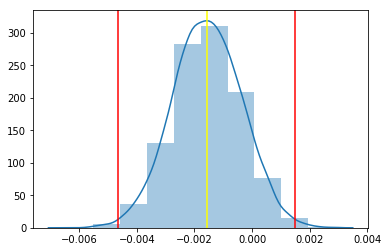

In [92]:
# same plot, but using seaborn
import seaborn as sns


sns.distplot(p_diffs, bins = 10);
plt.axvline(x= low, color = 'red');
plt.axvline(x=upper, color = 'red');
plt.axvline(x= obs_diffs, color = 'yellow');


In [93]:
null_vals = np.random.normal(0, p_diffs.std(), p_diffs.size)

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

The P value is: 0.9028


C:\Users\A.J\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


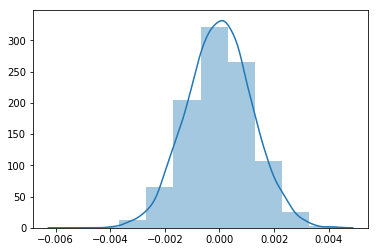

In [95]:
obs_diffs = treatm_conv - control_conv

print('The P value is:',(null_vals > obs_diffs).mean())

sns.distplot(null_vals, bins = 10);
#plt.axvline(x= obs_diffs, color = 'red')

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

The calculation above is solving for the P-value.  

We have a .05 alpha threshold.

If our P-value is <= .05, we have evidence to reject the null in favor of the alternative.  
If our P-value is > .05, we would not have evidence to reject the null.  

The P-value is larger than our threshold and we should not reject the null. We can say that the new page does not outperform the old page. 

In additon,
H1: p_new - p_old > 0, 
Our observed statistic comes is depicted as the yellow line on the graph.  
We can see that the yellow line falls in between the cofidence interval for the lower and upper bounds. 
The graph shows the observed statistic falling within the CI and supporting our null hypothesis.
Again, the new page does not outperform the old page in conversions. 

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [96]:
import statsmodels.api as sm

convert_old = df2.query("landing_page == 'old_page' & converted == '1'").shape[0]
convert_new = df2.query("landing_page == 'new_page' & converted == '1'").shape[0]
                        
n_old = df2.query("group == 'control'").shape[0]
n_new = df2.query("group == 'treatment'").shape[0]

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [97]:
#proportions_ztest(count, nobs, value=None, alternative='two-sided', prop_var=False)

z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], value=None, alternative='smaller', prop_var=False)

print('The z-score is:',z_score)
print('The p-value is:', p_value)


The z-score is: 1.3109241984234394
The p-value is: 0.9050583127590245


In [98]:
from scipy.stats import norm

#with an alpha of .05 divided by two because it is a two tailed test.

ninety_five_perc_crit = norm.ppf(1-(0.05/2))
# 1.959963984540054 # Tells us what our critical value at 95% confidence is

print('The critical value at 95% confidence is:', ninety_five_perc_crit)

The critical value at 95% confidence is: 1.959963984540054


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

Since the p-value is again higher than our alpha of .05, we accept the null.
The p-value also equals the prior P-value calculation of .905.
In conclusion, the new landing page does not provide value over the old page. 


The z-score is the number of standard deviations from the mean a data point is.
If a z-score is equal to 0, it is on the mean.
If a z-score is +/- 1 it is one standard deviations away from the mean.
If a z-score is +/- 2 it is two standard deviations away from the mean.

The z-score of the output is 1.31 and falls within the critical value range.
We can reject the null if the z-score was higher that the 95% critical value score of 1.96.
In this case, the z-score is lower.  We cannot reject the null, the new page does not provide value over the old page.


<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

We will use logistic regression.  

Logistic Regression is an approach that can be used to predict two possible outcomes.  
In this case, the two outcomes are a user either converts or does not convert, depending on 
old or new pages. 


b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [102]:
df2['intercept'] = 1

df2.head(1)

,user_id,timestamp,group,landing_page,converted,intercept,new_page,old_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1


In [103]:
# get dummies landing page
df2[['new_page', 'old_page']] = pd.get_dummies(df2['landing_page'])


#df2['new_page'].astype(str).value_counts()
#df2['old_page'].astype(str).value_counts()
#df2['control'].astype(str).value_counts()
#df2['ab_page'].astype(str).value_counts()
    
df2.head(1)

,user_id,timestamp,group,landing_page,converted,intercept,new_page,old_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1


In [107]:
#get dummies ab page
df2[['ab_page', 'control']] = pd.get_dummies(df2['group'])

df2.head(1)

,user_id,timestamp,group,landing_page,converted,intercept,new_page,old_page,ab_page,control
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1,1,0


In [108]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 0 to 294477
Data columns (total 10 columns):
user_id         290584 non-null int64
timestamp       290584 non-null object
group           290584 non-null object
landing_page    290584 non-null object
converted       290584 non-null int64
intercept       290584 non-null int64
new_page        290584 non-null uint8
old_page        290584 non-null uint8
ab_page         290584 non-null uint8
control         290584 non-null uint8
dtypes: int64(3), object(3), uint8(4)
memory usage: 16.6+ MB


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [109]:
# the columns created were intercept and ab page
logit_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [110]:
results = logit_mod.fit()

results.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Fri, 08 Feb 2019   Pseudo R-squ.:               8.077e-06
Time:                        14:09:43   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0038      0.008   -247.146      0.000      -2.020      -1.988
ab_page        0.0150      0.011      1.311      0.190      -0.007       0.037
==============================================================================
"""

In [111]:
# exponentiate coefficients for ease in interpretation

print(np.exp(-2.0038))
# returns a value less than one...for values less than one, it is useful to obtain reciprocal
print(1/np.exp(-2.0038))

print('\n')
print(np.exp(.0150))


0.13482198504454715
7.4171879287312485


1.015113064615719


For each 1 unit decrease in ab_page, converting is 1.015 times as likely holding all else constant.

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

The P-value associated with the ab_page is .190 and would not 
be categorized as statistically significant because it is larger than alpha(.05)

The p-value that was returned in the z-test method was 0.905. The manually calculated p-value from part 1 was 0.9028

The null hypothesis associated with a logistic regression is that there is no relationship between the dependent and independent variables. In this case, this means there is no relationship between which page a user is shown and the conversion rate. The alternative hypothesis would therefore be that there is a relationship of some sort.

Our intitial Hypothesis Theories from PT II:
#### HO: Pnew - Pold <= 0
#### H1: Pnew - Pold > 0



Logistic regression is used to predict two possible outcomes.  
The logistic hypothesis theories from PT III:

#### Beta0: Pnew -Pold = 0
#### Beta1: Pnew - Pold != 0

We can see that these are two different tests.  

The P-value in our logistic regression model differs from the two other P-values 
because our the initial Hypothesis is a one tailed test(better than or equal to.)  
The logistic Hypothesis is a two tailed test( better or not better.) 

In a two tailed test P-value relationship to slope are interpreted differently.   It essentially suggests there is not statistical evidence of a difference in the two conversion rates, but the connection between the p-value here and the p-value above is a bit disconnected because of the directional component of the previous alternative hypothesis.


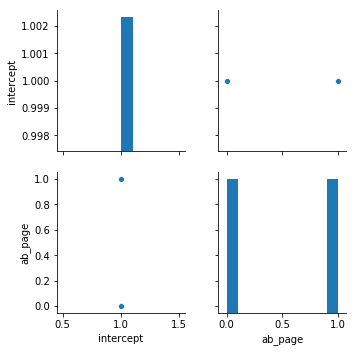

In [112]:
# looking at relationships between variables

sns.pairplot(df2[['intercept', 'ab_page']])

In [113]:
#VIF Factors

from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

y, X = dmatrices('converted ~  ab_page', df2, return_type = 'dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range (X.shape[1])]
vif["features"] = X.columns

vif

,VIF Factor,features
0,1.999752,Intercept
1,1.000000,ab_page


We would remove a VIF factor thats larger than 10.  If numbers are larger than 10, 
you have multicollinearity.  If that was the case, you would remove the variable of 
least interest.  

Our factors are both below 10 and can be used as explanatory variables. 

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

Adding additional factors may help the model with it's predictability. The additional factors might also create a better fit and accuracy score.  In business scenarios, adding factors may help to show you what the leading drivers of a metric may or may not be.  

In contrast, adding too many terms may cause long processing time to fit a regression model. Also, it may become difficult to understand which terms have significant impact.  Some terms may also be related. 

Disadvantages include:
-No linear relationships
-Correlated Errors, Covariance
-Non constant variance
-outliers
-multicollinearity
-interpretation complexity

You also need to consider the issues that users within the test will have with
change aversion and novelty effects. 




In [114]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix
np.random.seed(42)

In [115]:
y = df2['converted']

X = df2[['intercept', 'ab_page']]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =.10, random_state = 42)

In [116]:
# perform operations on training sets

log_mod = LogisticRegression()
log_mod.fit(X_train, y_train)

y_predicts = log_mod.predict(X_test)

#print(precision_score(y_test, y_predicts))
#print(recall_score(y_test, y_predicts))
#print(accuracy_score(y_test, y_predicts))
confusion_matrix(y_test, y_predicts)

array([[25591,     0],
       [ 3468,     0]], dtype=int64)

There are 25591 non conversions that were predicted to be non conversions
There are  0 conversions that were predicted to be non conversions

There are 3468 conversions that were predicted to be non conversions
There are 0 conversions that are predicted to be conversions

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [117]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [118]:
#making sure newly added data joined correctly
print(df_new.head(1))

#checking what labels are inside country...there are 3, US, UK, CA
df_new['country'].value_counts()

        country                   timestamp    group landing_page  converted  \
user_id                                                                        
834778       UK  2017-01-14 23:08:43.304998  control     old_page          0   

         intercept  new_page  old_page  ab_page  control  
user_id                                                   
834778           1         0         1        1        0  


US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [119]:
### Create the necessary dummy variables

df_new[['US', 'UK', 'CA']] = pd.get_dummies(df_new['country'])

In [120]:
#checking dummies added

df_new.head(1)

,country,timestamp,group,landing_page,converted,intercept,new_page,old_page,ab_page,control,US,UK,CA
user_id,,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,1,0,0,1,0


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [121]:
### Fit Your Linear Model And Obtain the Results

logit_new = sm.Logit(df_new['converted'], df_new[['intercept','ab_page', 'US', 'UK']])

results = logit_new.fit()
results.summary()



Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Fri, 08 Feb 2019   Pseudo R-squ.:               2.323e-05
Time:                        14:10:29   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0042      0.009   -224.560      0.000      -2.022      -1.987
ab_page        0.0149      0.011      1.307      0.191      -0.007       0.037
US            -0.0408      0.027     -1.516      0.130      -0.093       0.012
UK             0.0099      0.013      0.743      0.457      -0.016       0.036
==============================================================================
"""

In [122]:
1/np.exp(-.0408), np.exp(.0099)

(1.0416437559600236, 1.0099491671175422)

The US is 1.04 less likely to convert when compared to baseline CA holding all else constant

The UK is 1.01 more likely to convert when compared to baseline CA holding all else constant

The P-values for both do not appear to be statistically significant. The Rsquared value is essentially 0, not a good fit. 

<a id='conclusions'></a>
## Conclusions

Based on the simulations run in parts 1, 2, 3, we do not have statistical evidence to reject the null.  The P-values in each of the simulations were above our alpha of .05.  

Using current data, the new page does not warrant any further resources at the moment. A switch may be pursued if new factors like additional countries, a newer rendering of the landing page, running the study for a longer time period and or looking at different time releases are added to our data. 

Resources should be devoted to understanding why a test subject may or may not have converted depending on their page.  If a particular day of week or a particular type of customer (age, gender, area of living) has more conversion rate, we can either try to get more customer in that day or type, or try to understand why the other day/type doesn't work well and fix that.  

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.